In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

## Data import

In [2]:
#galaxy_filename = '/Useres/kellydouglass/Documents/Drexel/Research/Data/kias1033_5.dat'
galaxy_filename = '/Users/kellydouglass/Documents/Drexel/Research/Data/kias1033_5_P-MJD-F_MPAJHU_ZdustOS_stellarMass_BPT_SFR_NSA_correctVflag.txt'

data = Table.read(galaxy_filename, format='ascii.commented_header')

In [3]:
# Filter galaxies
boolean = data['imc'] == 2 # spiral or irregular galaxies
spiral_irregular = data[boolean]

boolean = spiral_irregular['aimc'] > 2 # Normal late type
galaxies = spiral_irregular[boolean]

#red_galaxies = data[np.logical_not(boolean)]

## Calculate aimc value

In [73]:
aimc_log = np.log10(galaxies['u_r'] - 1j*galaxies['cd'])



aimc_ln = np.log(galaxies['u_r'] - 1j*galaxies['cd'])
neg_boolean = aimc_ln.imag < 0
aimc_ln[neg_boolean] = 2j*np.pi + aimc_ln[neg_boolean]





ur_shift = -1.343#-1.325
cd_shift = 0.260#0.267

aimc_tan = np.arctan2(-galaxies['cd'] + cd_shift, galaxies['u_r'] + ur_shift)
#aimc_tan = np.arctan((-galaxies['cd'] + cd_shift)/(galaxies['u_r'] + ur_shift))
#aimc_tan = np.arctan(-galaxies['cd']/galaxies['u_r'])
aimc_tan = aimc_tan*180/np.pi

# Shift to 0-360
aimc_tan[-galaxies['cd'] + cd_shift < 0] += 360

# Shift those with high inverse concentration indices up to the next period (>360)
aimc_tan[np.logical_and(galaxies['u_r'] < 2, aimc_tan < 13)] += 360

'''
for i in range(len(galaxies)):
    if galaxies['u_r'][i] + ur_shift < 0:
        aimc_tan[i] = aimc_tan[i] + 180
    else:
        if -galaxies['cd'][i] + cd_shift < 0:
            aimc_tan[i] = aimc_tan[i] + 360
''';

<IPython.core.display.Javascript object>


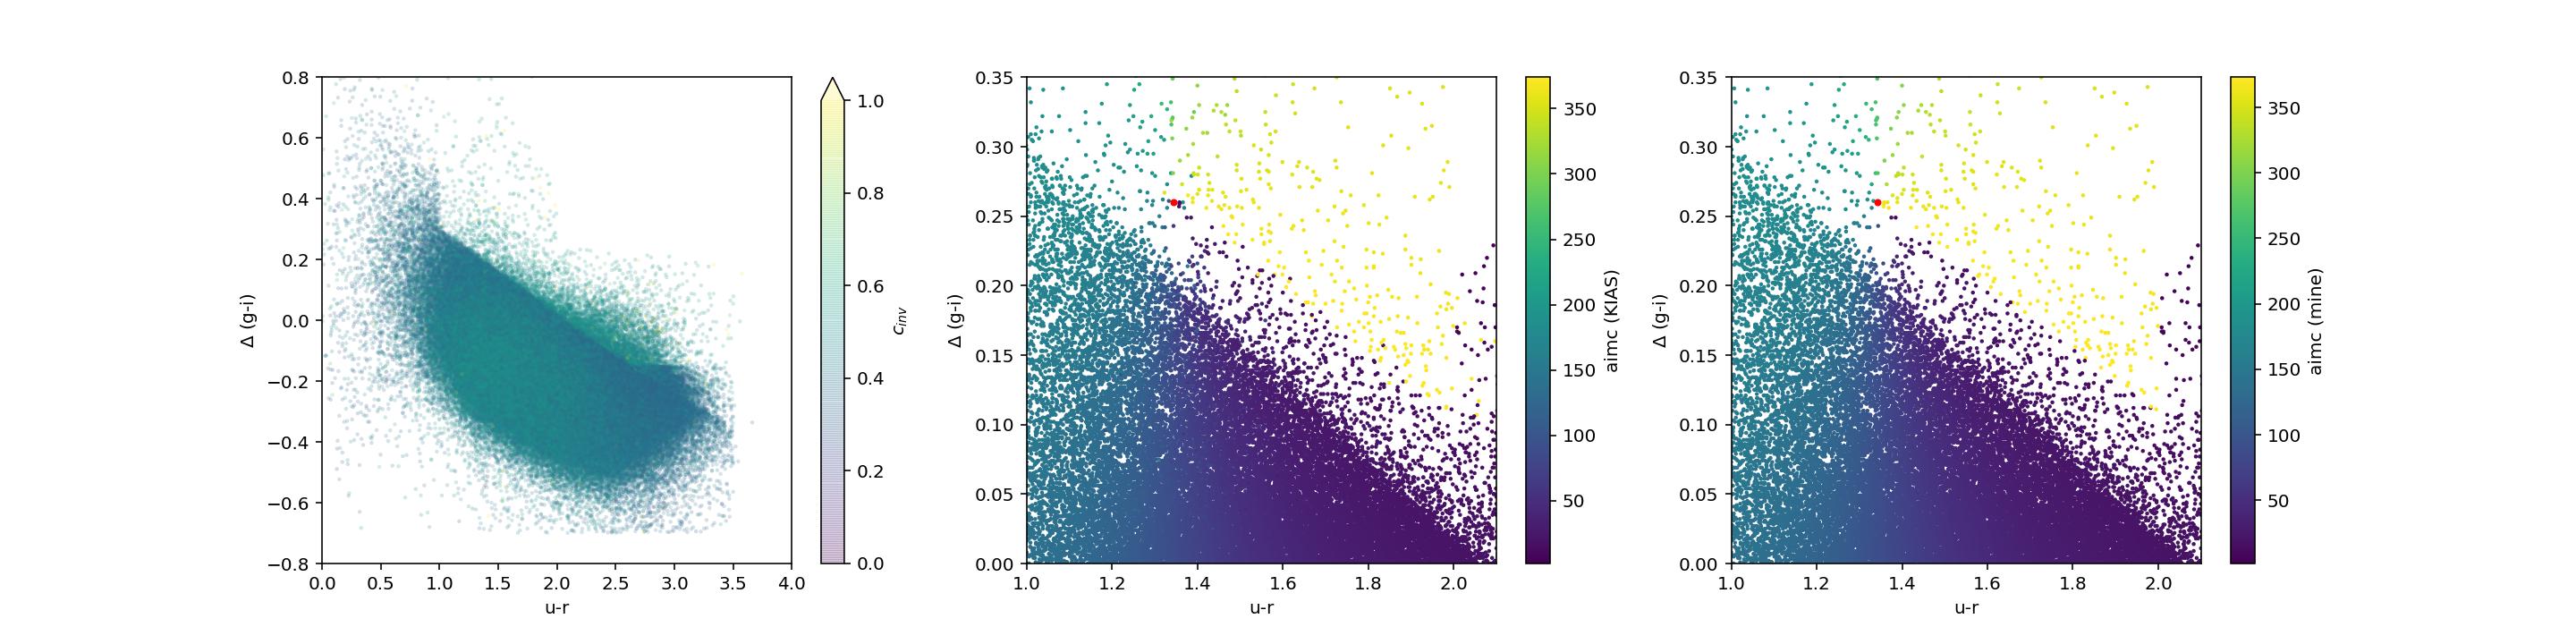

In [74]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(galaxies['u_r'], galaxies['cd'], s=5, c=galaxies['conx1'], 
            alpha=0.2, edgecolors='none')
plt.xlabel('u-r')
plt.ylabel('$\Delta$ (g-i)')
plt.axis([0, 4, -0.8, 0.8])
cbar = plt.colorbar(extend='max')
plt.clim(0,1)
cbar.ax.set_ylabel('$c_{inv}$')

plt.subplot(132)
plt.scatter(galaxies['u_r'], galaxies['cd'], s=5, c=galaxies['aimc'], 
            alpha=1, edgecolors='none')
plt.plot(-ur_shift, cd_shift, 'r.')
plt.xlabel('u-r')
plt.ylabel('$\Delta$ (g-i)')
plt.axis([1, 2.1, 0, 0.35])
cbar2=plt.colorbar()
cbar2.ax.set_ylabel('aimc (KIAS)');

plt.subplot(133)
plt.scatter(galaxies['u_r'], galaxies['cd'], s=5, c=aimc_tan, 
            alpha=1, edgecolors='none')
plt.plot(-ur_shift, cd_shift, 'r.')
plt.xlabel('u-r')
plt.ylabel('$\Delta$ (g-i)')
plt.axis([1, 2.1, 0, 0.35])
cbar3=plt.colorbar()
cbar3.ax.set_ylabel('aimc (mine)');

<IPython.core.display.Javascript object>


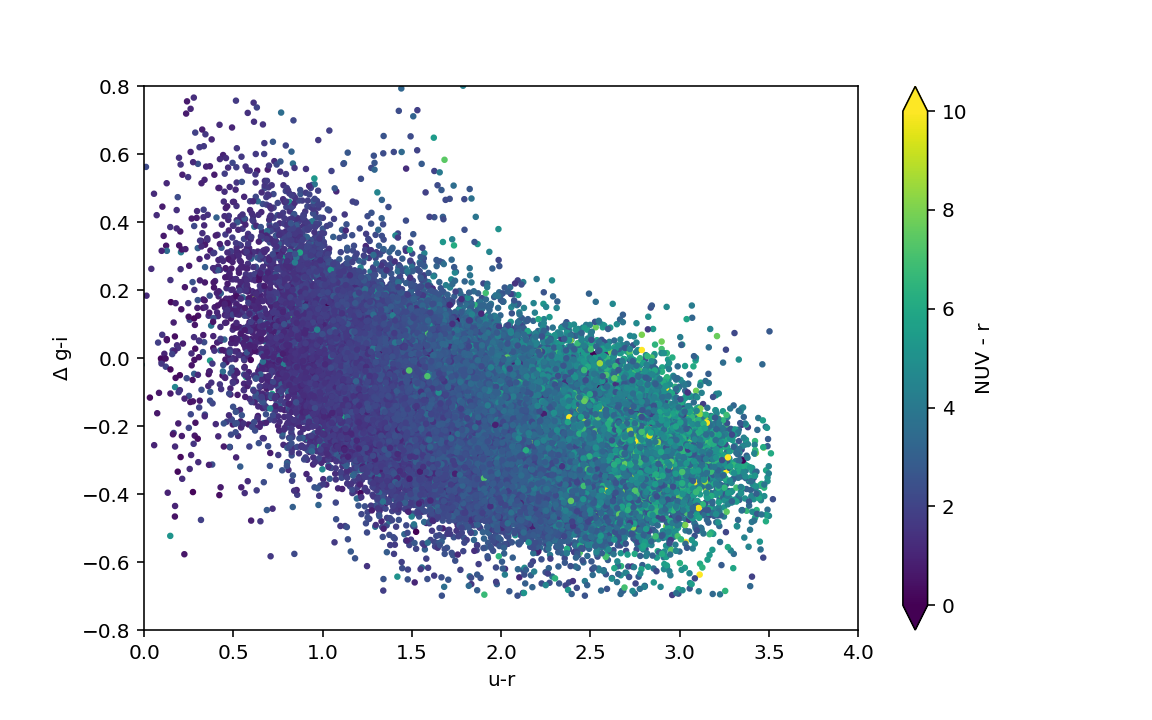

In [26]:
plt.figure(figsize=(8,5))

#plt.scatter(data['u_r'], data['cd'], s=5, c=data['NUV_r'])
#plt.scatter(data['u_r'], data['cd'], s=5, c=data['conx1'])

plt.scatter(galaxies['u_r'], galaxies['cd'], s=5, c=galaxies['NUV_r'])

#plt.scatter(red_galaxies['u_r'], red_galaxies['cd'], s=5, c=red_galaxies['NUV_r'])

plt.axis([0, 4, -0.8, 0.8])

plt.xlabel('u-r')
plt.ylabel('$\Delta$ g-i')

cbar = plt.colorbar(extend='both')
plt.clim(0,10) # NUV-r
#plt.clim(0,1) # conx1
#plt.clim(0,360) # aimc
cbar.ax.set_ylabel('NUV - r');

<IPython.core.display.Javascript object>


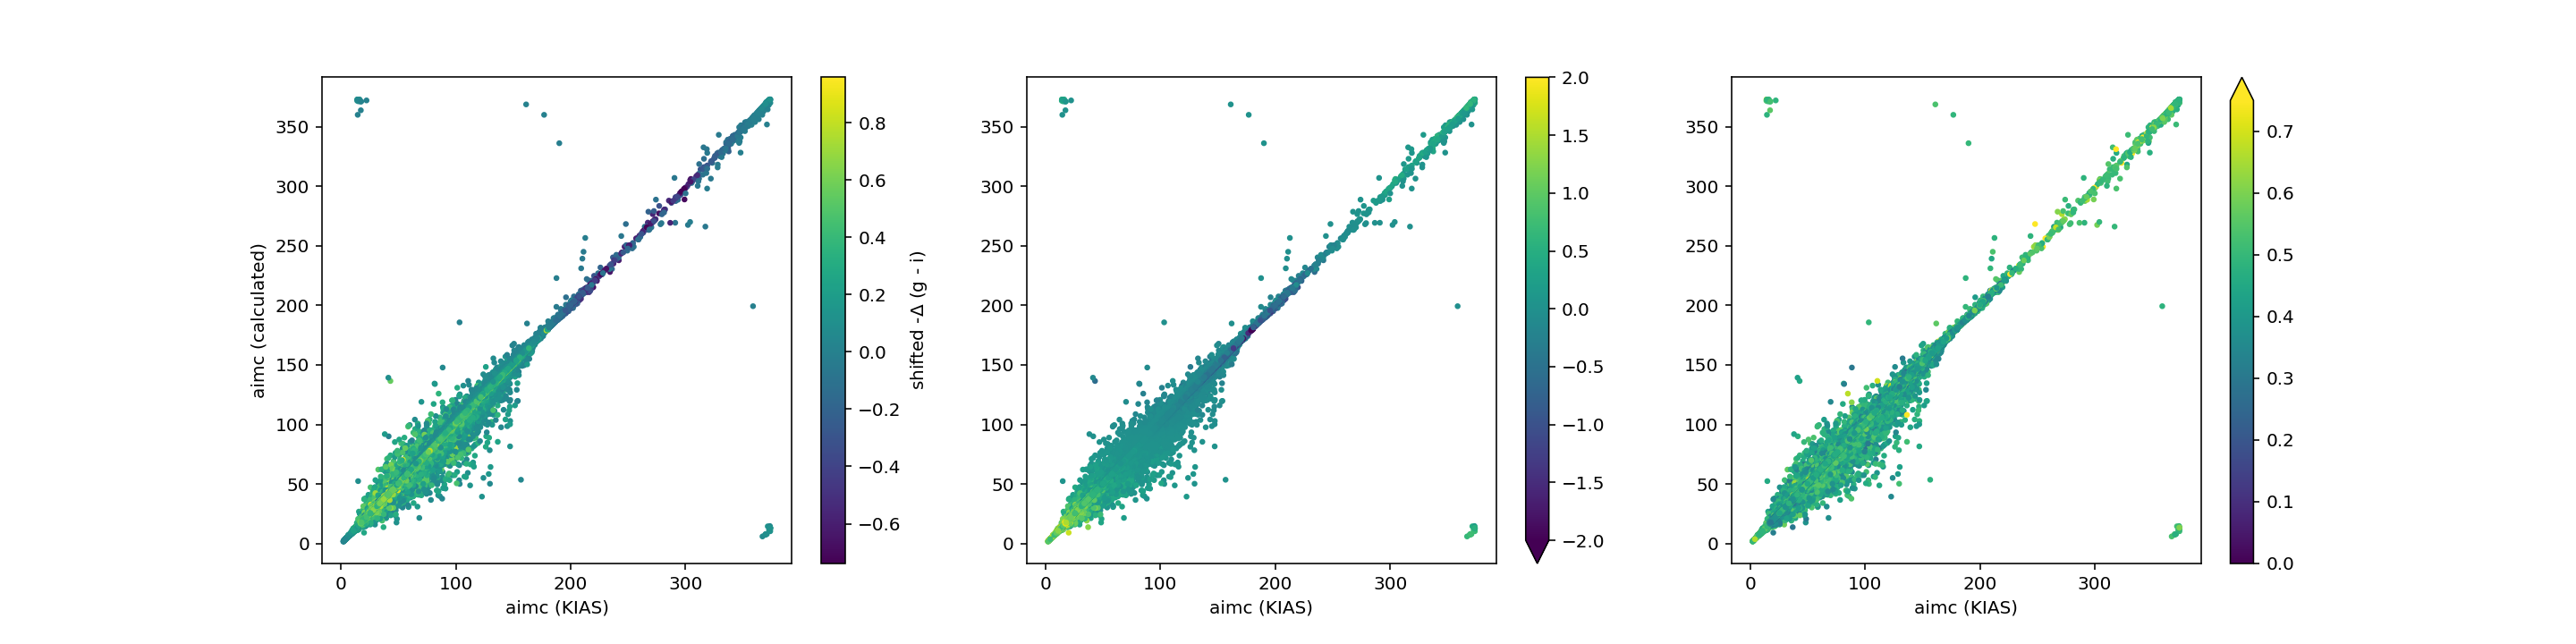

In [75]:
plt.figure(figsize=(20,5))

#plt.scatter(galaxies['aimc'],np.abs(aimc_ln.imag)*180/np.pi, s=5, c=galaxies['mr'])
#plt.scatter(galaxies['aimc'],aimc_log.imag, s=5, c=galaxies['conx1'])

plt.subplot(131)
plt.scatter(galaxies['aimc'],aimc_tan, s=5, c=(-galaxies['cd'] + cd_shift))
#plt.scatter(galaxies['aimc'],aimc_tan, s=5, c=galaxies['cd'])
plt.xlabel('aimc (KIAS)')
plt.ylabel('aimc (calculated)')
cbar1 = plt.colorbar()
cbar1.ax.set_ylabel('shifted -$\Delta$ (g - i)')
#plt.clim(-0.5,1)

plt.subplot(132)
plt.scatter(galaxies['aimc'],aimc_tan, s=5, c=(galaxies['u_r'] + ur_shift))
#plt.scatter(galaxies['aimc'],aimc_tan, s=5, c=galaxies['u_r'])
plt.xlabel('aimc (KIAS)')
#plt.ylabel('aimc (calculated)')
cbar2 = plt.colorbar(extend='min')
cbar2.ax.set_ylabel('shifted u - r')
plt.clim(-2,2)

plt.subplot(133)
plt.scatter(galaxies['aimc'],aimc_tan, s=5, c=galaxies['conx1'])
plt.xlabel('aimc (KIAS)')
#plt.ylabel('aimc (calculated)')
cbar3 = plt.colorbar(extend='max')
cbar3.ax.set_ylabel('$c_{inv}$')
plt.clim(0,0.75);

<IPython.core.display.Javascript object>


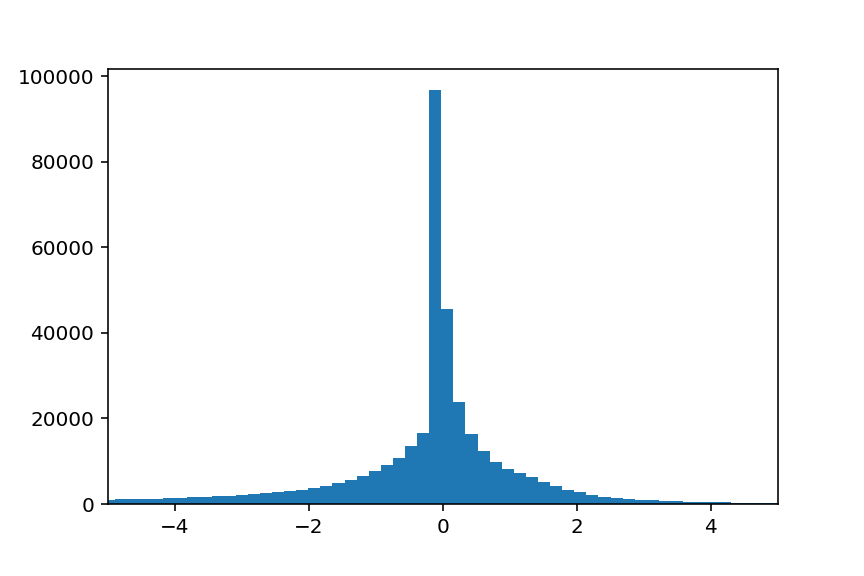

77134
383892


In [76]:
plt.figure()

diffs = aimc_tan - galaxies['aimc']

plt.hist(diffs, bins=4000)

plt.xlim(-5, 5)

print(np.sum(np.abs(diffs) < 0.1))
print(len(aimc_tan))

<IPython.core.display.Javascript object>


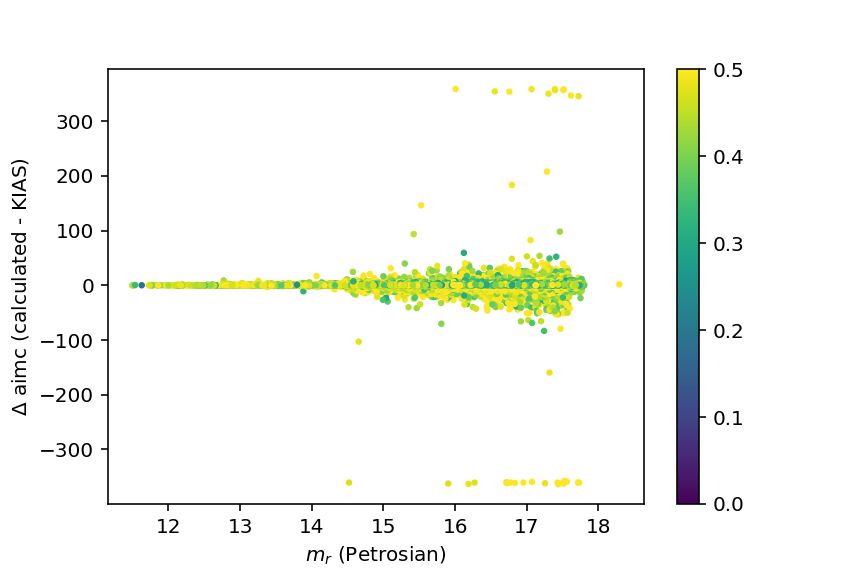

In [77]:
plt.figure()

plt.scatter(galaxies['prmag'], aimc_tan - galaxies['aimc'], s=5, c=galaxies['conx1'])
plt.xlabel('$m_r$ (Petrosian)')

#plt.scatter(galaxies['mr'], aimc_tan - galaxies['aimc'], s=5)
#plt.xlabel('$m_r$ (Model)')

#plt.scatter(galaxies['rabsmag'], aimc_tan - galaxies['aimc'], s=5)
#plt.xlabel('$M_r$')

plt.ylabel('$\Delta$ aimc (calculated - KIAS)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('$c_{inv}$')
plt.clim(0,0.5);

<IPython.core.display.Javascript object>


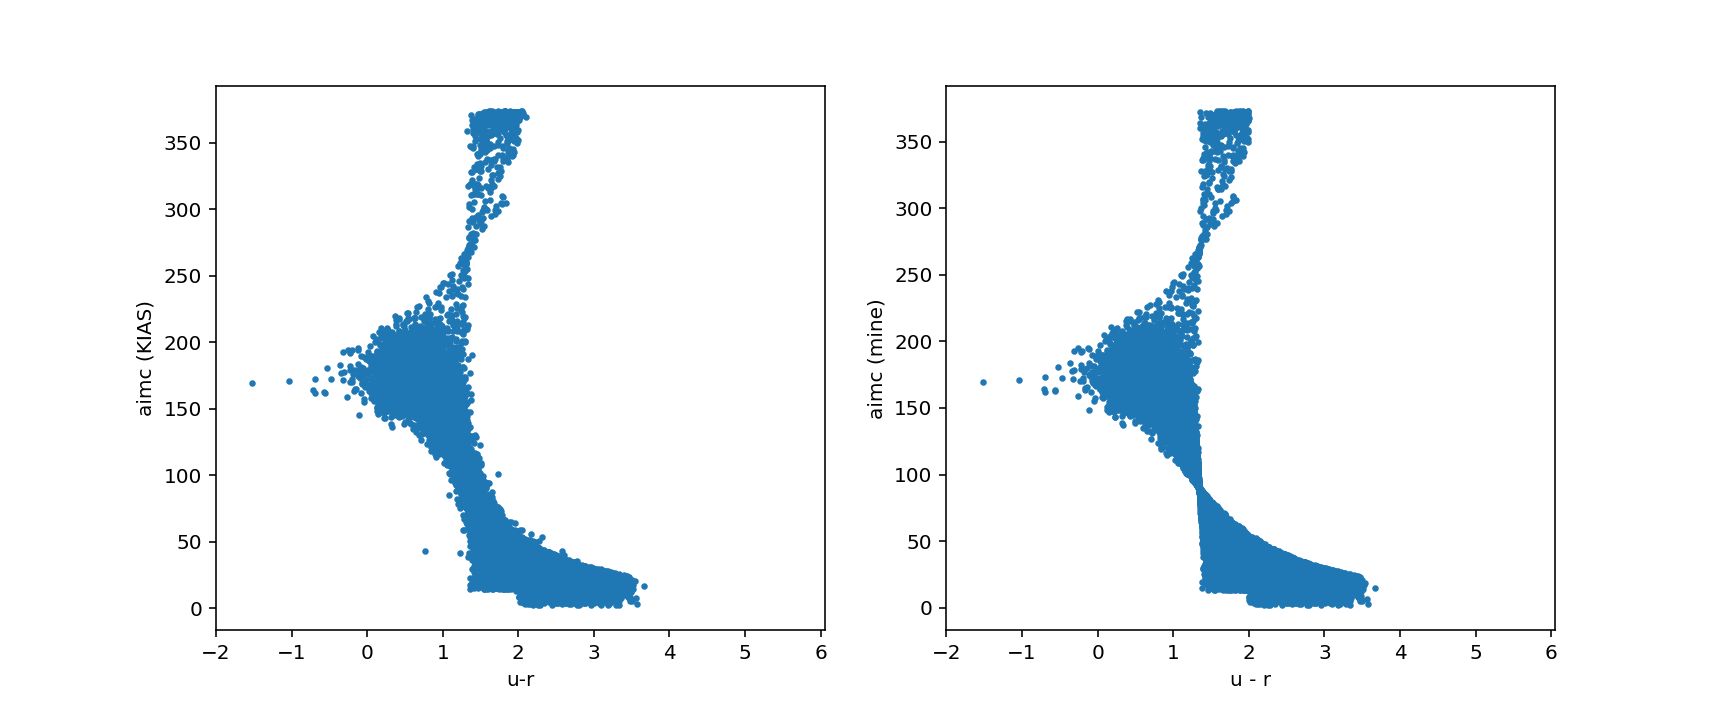

In [78]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(galaxies['u_r'], galaxies['aimc'], s=5)
plt.xlim(xmin=-2)
plt.xlabel('u-r')

#plt.scatter(galaxies['cd'], galaxies['aimc'], s=5)
#plt.xlabel('$\Delta$ g-i')

#plt.scatter(galaxies['conx1'], galaxies['aimc'], s=5)
#plt.xlim(xmax=1)
#plt.xlabel('$c_{inv}$')

#plt.scatter(galaxies['prmag'], galaxies['aimc'], s=5)
#plt.xlabel('$m_r$ (Petrosian)')

plt.ylabel('aimc (KIAS)')


plt.subplot(122)
plt.scatter(galaxies['u_r'], aimc_tan, s=5)
plt.xlim(xmin=-2)
plt.xlabel('u - r')

plt.ylabel('aimc (mine)');

<IPython.core.display.Javascript object>


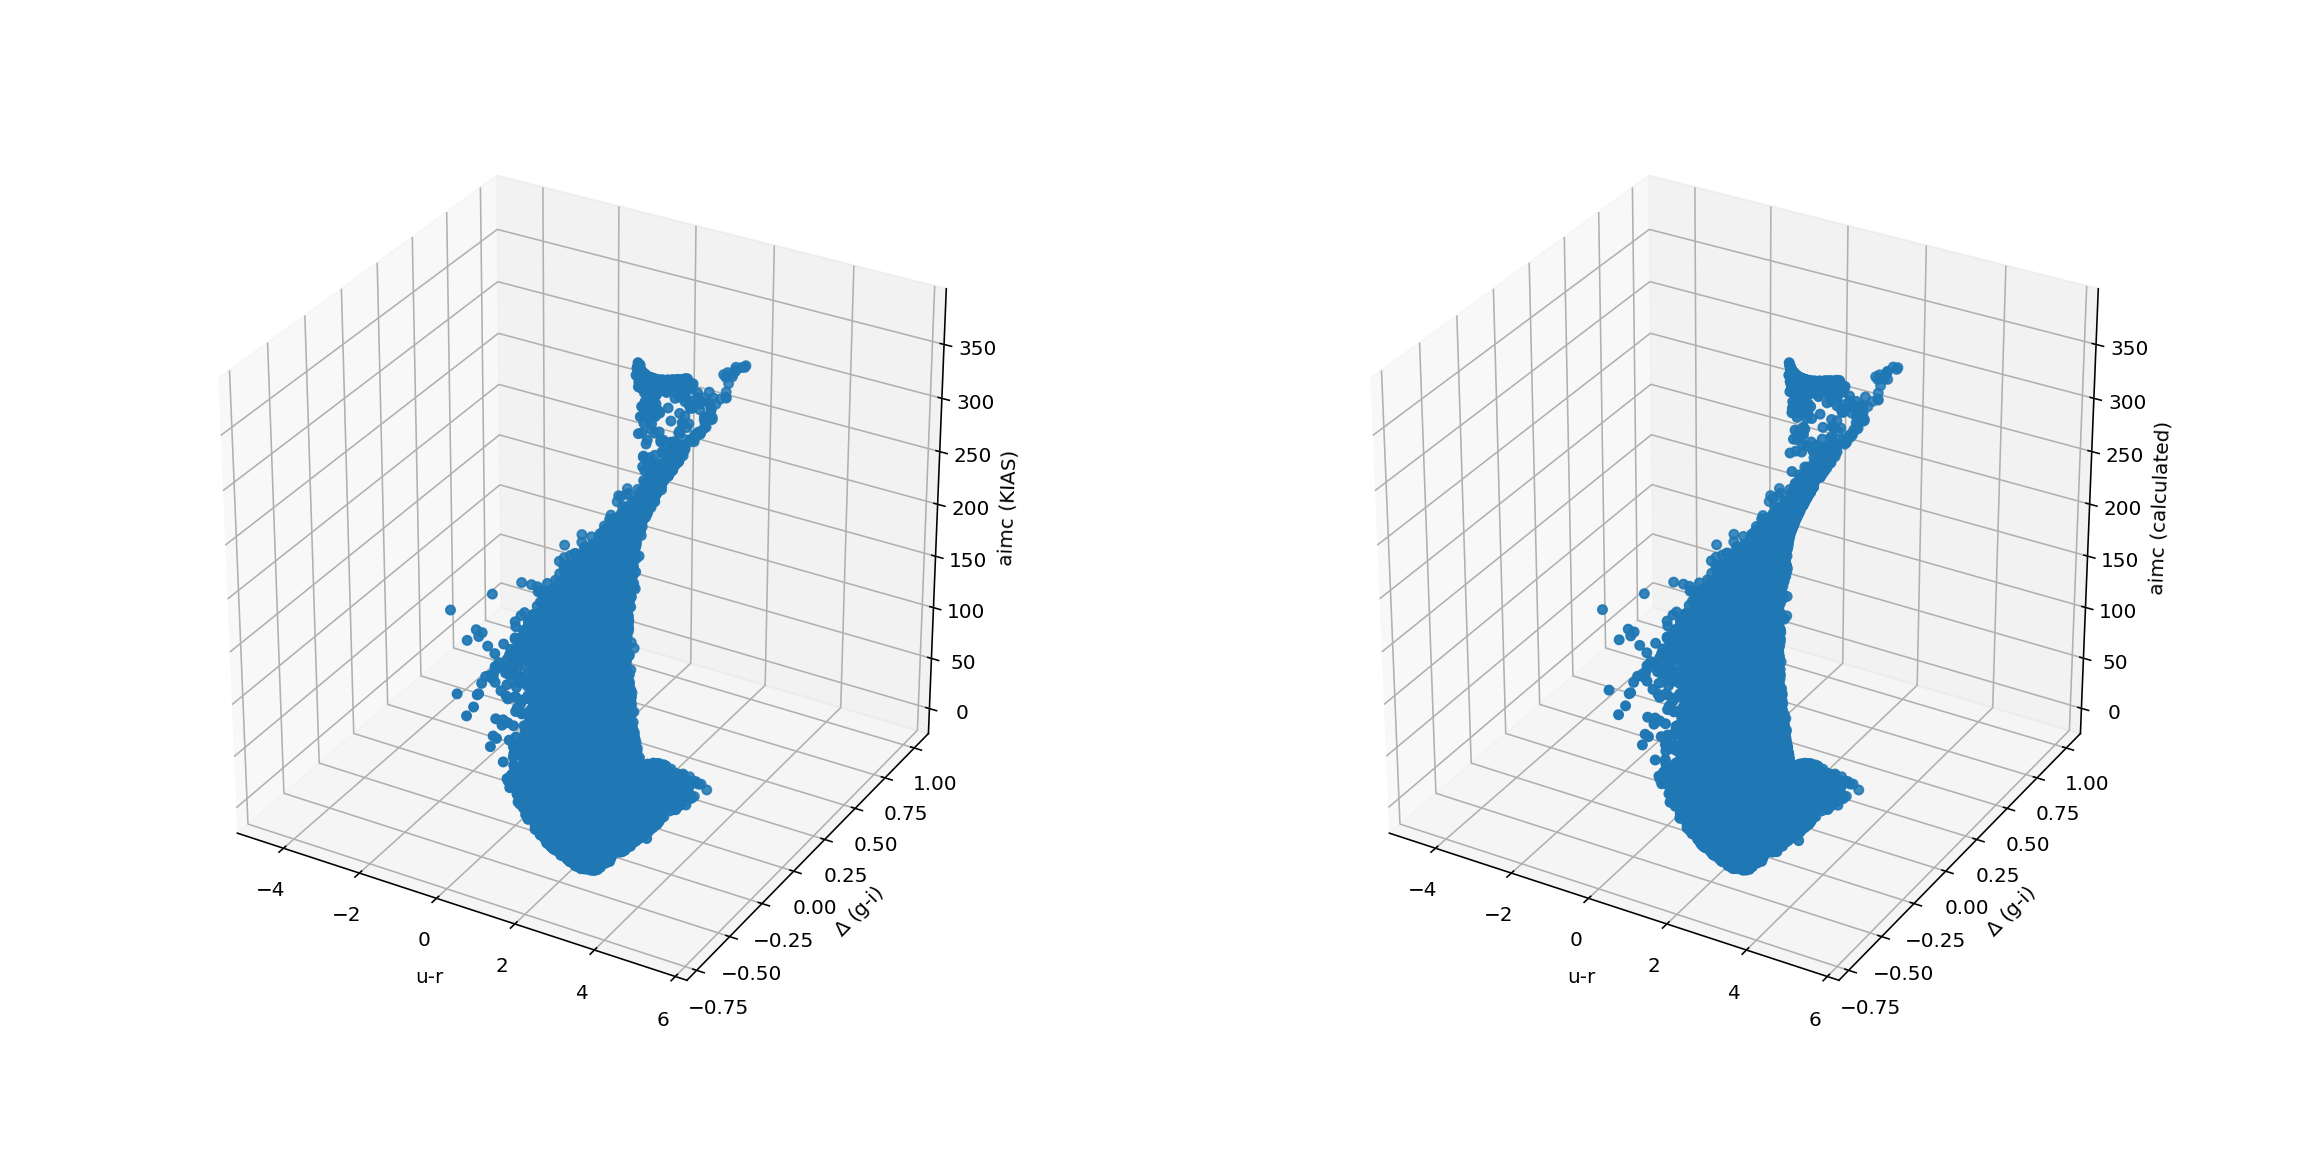

In [49]:
fig = plt.figure(figsize=(16,8))

axes = fig.add_axes([.05,.1,.4,.8], projection='3d')
axes.scatter(galaxies['u_r'], galaxies['cd'], galaxies['aimc'])

axes.set_xlim(left=-5)

axes.set_xlabel('u-r')
axes.set_ylabel('$\Delta$ (g-i)')
axes.set_zlabel('aimc (KIAS)')



axes2 = fig.add_axes([.55, .1, .4, .8], projection='3d')
axes2.scatter(galaxies['u_r'], galaxies['cd'], aimc_tan)

axes2.set_xlim(left=-5)

axes2.set_xlabel('u-r')
axes2.set_ylabel('$\Delta$ (g-i)')
axes2.set_zlabel('aimc (calculated)');

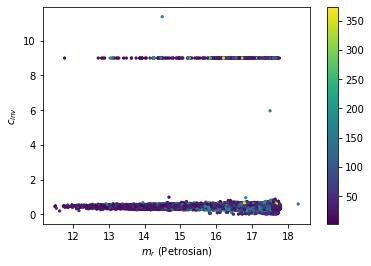

In [12]:
plt.figure()

plt.scatter(galaxies['prmag'], galaxies['conx1'], s=5, c=galaxies['aimc'])

plt.xlabel('$m_r$ (Petrosian)')
plt.ylabel('$c_{inv}$')

plt.colorbar()

In [83]:
galaxies

index,ra,dec,redshift,Rgal,rabsmag,u_r,imc,aimc,cd,conx1,prmag,epetR,epetRc,iso_a,iso_b,abtrue,phi_iso_deg,vdisp,vdisperr,snmedian,rdev,ab_dev,rexp,ab_exp,mflag,mr,g_r,Ez,vflag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
751.0,38.363598,0.210654,0.05405,160.31,-20.959,2.495,2.0,25.88,-0.297,0.417,15.09,13.78,13.704,25.21,10.3,0.41,-75.63,137.34,5.46,26.55,10.349,0.407,6.239,0.386,0.0,15.309,0.877,160.305594057,0
1048.0,54.977749,0.501912,0.139322,405.94,-20.943,2.223,2.0,25.78,-0.163,0.43,17.242,4.97,4.768,7.5,5.4,0.71,-10.86,133.73,10.1,13.41,3.845,0.68,2.005,0.704,0.0,17.385,0.749,405.943133443,0
1049.0,54.992764,0.460376,0.127314,371.9,-20.776,1.968,2.0,38.77,-0.243,0.479,17.186,7.2,7.141,9.19,5.99,0.65,54.25,105.81,15.34,8.83,10.14,0.458,3.974,0.462,0.0,17.283,0.637,371.903945887,0
1062.0,55.216221,0.521814,0.139633,406.82,-20.729,2.438,2.0,28.21,-0.326,0.444,17.446,7.58,7.501,9.0,5.84,0.65,34.35,132.51,12.09,9.37,3.758,0.909,2.263,0.86,0.0,17.396,0.824,406.822293896,0
1068.0,55.213821,0.434249,0.020484,61.16,-16.551,1.237,2.0,103.42,-0.133,0.535,17.405,8.64,8.571,9.75,6.11,0.63,-37.8,0.0,17.94,5.73,15.378,0.598,4.656,0.62,0.0,17.449,0.397,61.1628276995,0
1070.0,55.263435,0.474025,0.020532,61.31,-18.328,1.353,2.0,81.76,0.117,0.365,15.613,8.34,8.275,15.92,9.09,0.57,-56.54,25.91,15.42,33.35,4.447,0.669,2.558,0.708,0.0,15.558,0.405,61.3055675732,0
1082.0,55.485016,0.576631,0.068919,203.79,-19.609,1.778,2.0,36.13,-0.058,0.432,16.985,5.37,5.25,8.53,4.79,0.55,43.57,85.96,12.22,16.76,4.107,0.55,2.163,0.588,0.0,17.135,0.667,203.787329461,0
1105.0,55.684448,0.551383,0.039925,118.75,-18.382,1.345,2.0,87.53,-0.004,0.477,17.044,13.17,13.107,12.57,8.38,0.67,19.26,0.0,59.5,6.51,15.348,0.602,5.175,0.646,0.0,17.191,0.468,118.750338536,0
1126.0,55.945786,0.468164,0.040076,119.2,-18.084,1.493,2.0,48.55,0.087,0.453,17.326,3.55,3.416,5.85,4.21,0.71,-66.8,33.08,18.96,16.81,2.681,0.451,1.828,0.446,0.0,17.501,0.557,119.195851112,0
